In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

In [4]:
df1 = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [5]:
df1

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# Preprocessing

In [27]:
# Check for missing values
df1.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

### Checking For Duplicates

In [28]:
duplicates = df1.duplicated()

# Print duplicates
print("Duplicates:")
df1[duplicates]

Duplicates:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [29]:
print(len(df1[duplicates]))

24


## Figure showing  the original balance of classes

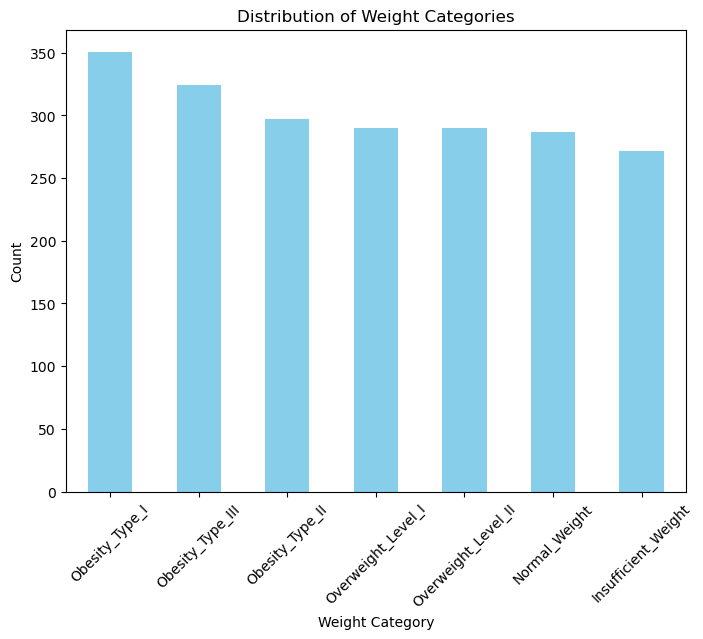

In [31]:
# Count the occurrences of each category in the 'NObeyesdad' column
category_counts = df1['NObeyesdad'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(8, 6))  # Optional: adjust the figure size
category_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Weight Category')
plt.ylabel('Count')
plt.title('Distribution of Weight Categories')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Figure showing the balance of classes if duplicates are removed

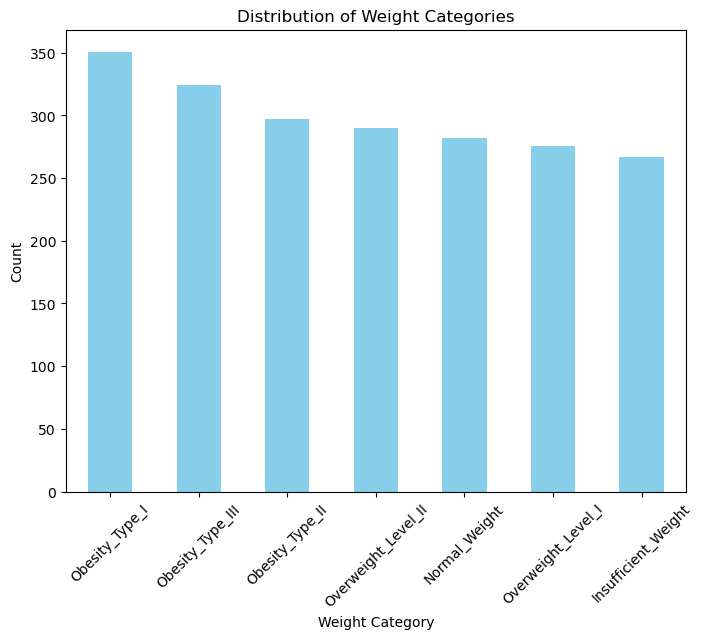

In [30]:
# Remove duplicates
cleaned_df = df1.drop_duplicates()

# Count the occurrences of each category in the 'NObeyesdad' column
category_counts = cleaned_df['NObeyesdad'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(8, 6))  # Optional: adjust the figure size
category_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Weight Category')
plt.ylabel('Count')
plt.title('Distribution of Weight Categories')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [19]:
# Save the cleaned DataFrame to a CSV file
cleaned_df.to_csv('cleaned_obesity_data.csv', index=False)

## Resampled Data

In [134]:
df = pd.read_csv('Resampled_Obesity_Data.csv')

In [135]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,22,1.720000,68.000000,yes,yes,2.0,3.0,Sometimes,no,2.000000,no,1.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,23,1.640000,52.000000,no,yes,3.0,1.0,Sometimes,no,2.000000,no,2.000000,2.000000,no,Public_Transportation,Normal_Weight
2,Male,26,1.720000,65.000000,yes,yes,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,Sometimes,Walking,Normal_Weight
3,Male,20,1.600000,56.000000,no,yes,2.0,3.0,Sometimes,no,2.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
4,Male,23,1.750000,69.000000,no,no,3.0,3.0,no,no,2.000000,no,2.000000,1.000000,Sometimes,Automobile,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,Female,26,1.609370,105.407313,yes,yes,3.0,3.0,Sometimes,no,2.609052,no,0.000000,0.548590,Sometimes,Public_Transportation,Obesity_Type_III
1900,Female,26,1.611452,102.363149,yes,yes,3.0,3.0,Sometimes,no,1.031701,no,0.034650,0.912345,Sometimes,Public_Transportation,Obesity_Type_III
1901,Female,26,1.641849,111.682693,yes,yes,3.0,3.0,Sometimes,no,2.632253,no,0.000000,0.244205,Sometimes,Public_Transportation,Obesity_Type_III
1902,Female,26,1.610636,105.423532,yes,yes,3.0,3.0,Sometimes,no,2.180566,no,0.000000,0.519905,Sometimes,Public_Transportation,Obesity_Type_III


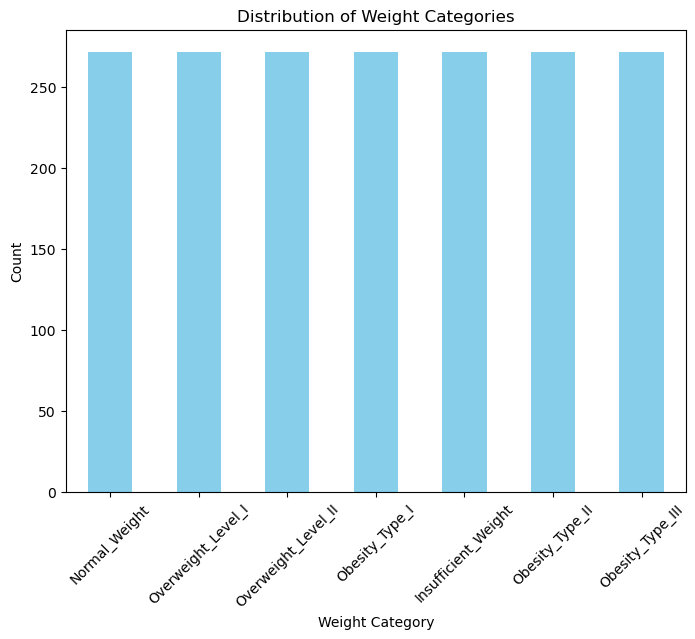

In [74]:
# Count the occurrences of each category in the 'NObeyesdad' column
category_counts1 = df['NObeyesdad'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(8, 6))  # Optional: adjust the figure size
category_counts1.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Weight Category')
plt.ylabel('Count')
plt.title('Distribution of Weight Categories')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

# EDA

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1904 non-null   object 
 1   Age                             1904 non-null   int64  
 2   Height                          1904 non-null   float64
 3   Weight                          1904 non-null   float64
 4   family_history_with_overweight  1904 non-null   object 
 5   FAVC                            1904 non-null   object 
 6   FCVC                            1904 non-null   float64
 7   NCP                             1904 non-null   float64
 8   CAEC                            1904 non-null   object 
 9   SMOKE                           1904 non-null   object 
 10  CH2O                            1904 non-null   float64
 11  SCC                             1904 non-null   object 
 12  FAF                             19

In [76]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
Numerical Columns: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [77]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000
mean,24.214286,1.701616,85.340637,2.416529,2.696835,2.000463,1.018695,0.657763
std,6.347883,0.093349,26.344806,0.536450,0.777991,0.612551,0.851646,0.611113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,64.719273,2.000000,2.675964,1.577498,0.129721,0.000000
50%,23.000000,1.700357,82.000000,2.385066,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768232,105.662801,3.000000,3.000000,2.454183,1.680162,1.000000
max,61.000000,1.980000,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


## Vizualization of Distribution

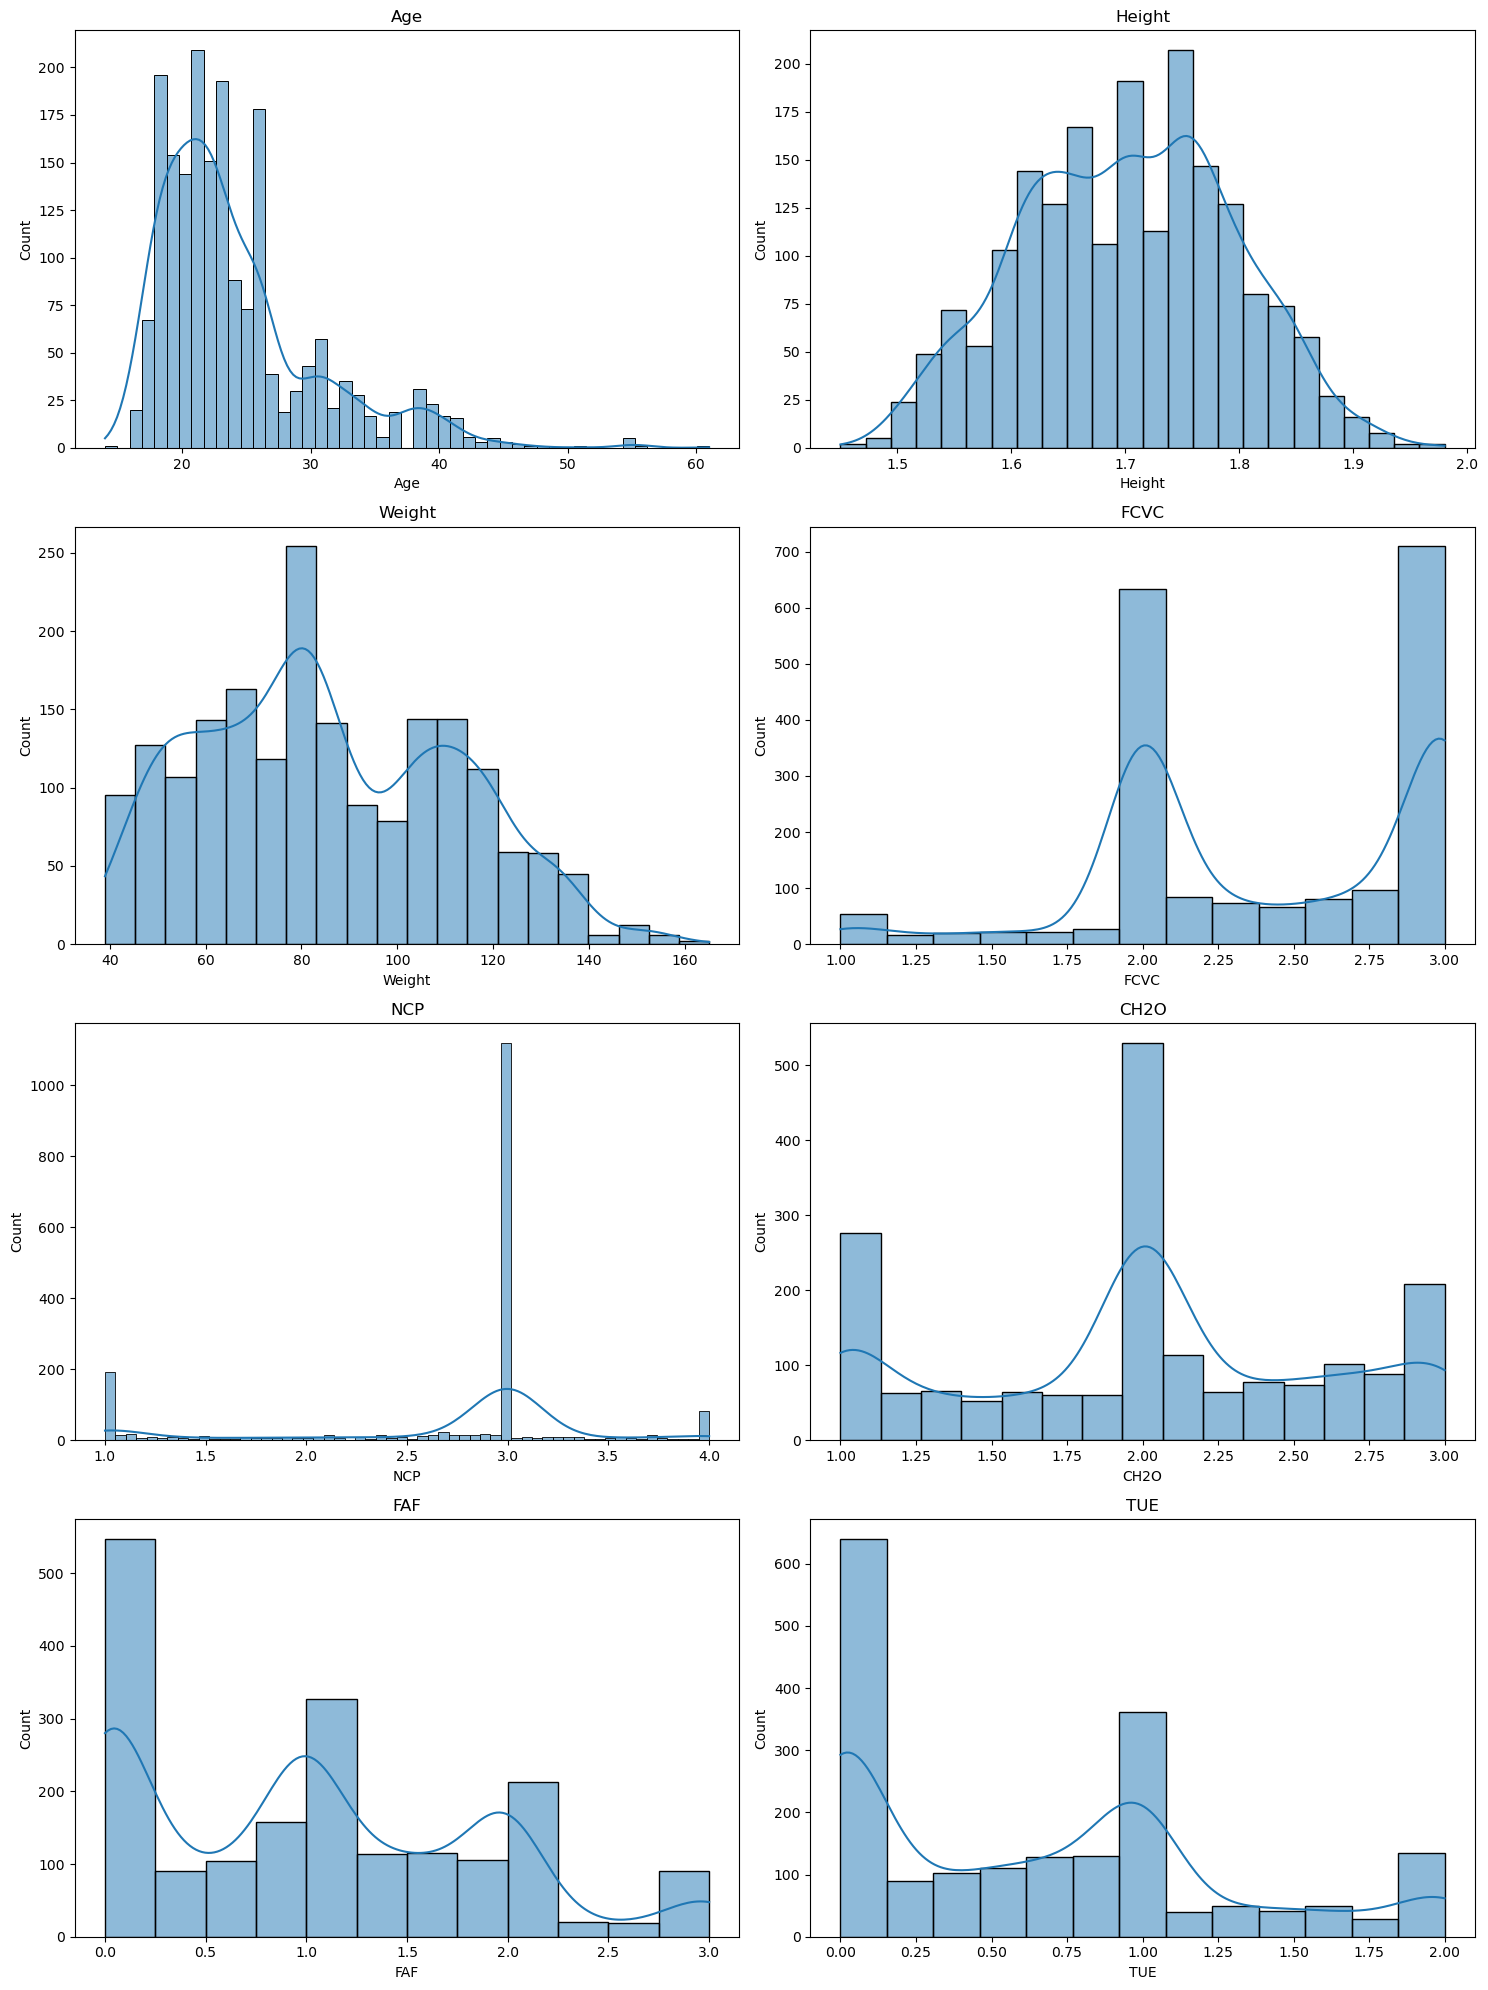

In [78]:
# Numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate number of rows and columns needed
num_plots = len(numerical_columns)
num_rows = (num_plots + 1) // 2
num_cols = 2

# Plot distribution charts for numerical variables using matplotlib
plt.figure(figsize=(15, 20))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()

# Save the output image
plt.savefig('numerical_distribution_plots.png')

plt.show()

In [79]:
df.skew(axis=0, skipna=True)

C:\Users\user\AppData\Local\Temp\ipykernel_10860\3081074228.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew(axis=0, skipna=True)


Age       1.537458
Height   -0.018852
Weight    0.298034
FCVC     -0.442721
NCP      -1.106592
CH2O     -0.095437
FAF       0.488589
TUE       0.615149
dtype: float64

Skewness measures the asymmetry of the distribution of a variable. Here's what the skewness values indicate for each variable:

1. Age (1.529100):
   - The positive skewness value (greater than 0) indicates that the distribution of ages is skewed to the right.
   - This suggests that there may be a concentration of younger individuals in the dataset, with a longer tail towards older ages.

2. Height (-0.012855):
   - The skewness value close to zero indicates that the distribution of heights is approximately symmetric.
   - The distribution is neither skewed to the left nor to the right, suggesting a relatively balanced distribution of heights.

3. Weight (0.255410):
   - The positive skewness value indicates that the distribution of weights is skewed to the right.
   - This suggests that there may be a concentration of lighter individuals in the dataset, with a longer tail towards heavier weights.

4. FCVC (-0.432906):
   - The negative skewness value (less than 0) indicates that the distribution of FCVC (Frequency of Vegetables Consumption per week) is skewed to the left.
   - This suggests that there may be a concentration of individuals with lower frequencies of vegetable consumption, with a longer tail towards higher frequencies.

5. NCP (-1.107097):
   - The strong negative skewness value indicates that the distribution of NCP (Number of Main Meals per day) is highly skewed to the left.
   - This suggests that there may be a concentration of individuals with fewer main meals per day, with a longer tail towards more frequent consumption.

6. CH2O (-0.104912):
   - The skewness value close to zero indicates that the distribution of CH2O (Daily Water Consumption) is approximately symmetric.
   - The distribution is neither skewed to the left nor to the right, suggesting a relatively balanced distribution of daily water consumption.

7. FAF (0.498490):
   - The positive skewness value indicates that the distribution of FAF (Physical Activity Frequency) is skewed to the right.
   - This suggests that there may be a concentration of individuals with lower physical activity frequencies, with a longer tail towards higher frequencies.

8. TUE (0.618502):
   - The positive skewness value indicates that the distribution of TUE (Time using Technology Devices) is skewed to the right.
   - This suggests that there may be a concentration of individuals with lower technology usage times, with a longer tail towards higher usage times.

In [80]:
df.kurtosis()

C:\Users\user\AppData\Local\Temp\ipykernel_10860\615572439.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurtosis()


Age       2.869250
Height   -0.557330
Weight   -0.751252
FCVC     -0.624802
NCP       0.429386
CH2O     -0.871018
FAF      -0.623593
TUE      -0.562731
dtype: float64

Age (2.826389):
The positive kurtosis value (greater than 3) indicates that the distribution of ages is leptokurtic.
This suggests that the distribution has fatter tails and is more peaked compared to a normal distribution, indicating a higher frequency of extreme values (both high and low) compared to a normal distribution.

Height (-0.562949):
The negative kurtosis value (less than 3) indicates that the distribution of heights is platykurtic.
This suggests that the distribution has thinner tails and is less peaked compared to a normal distribution, indicating lighter tails and fewer extreme values compared to a normal distribution.

Weight (-0.699898):
The negative kurtosis value (less than 3) indicates that the distribution of weights is platykurtic.
Similar to height, this suggests that the distribution has thinner tails and is less peaked compared to a normal distribution.

FCVC (-0.637546):
The negative kurtosis value (less than 3) indicates that the distribution of FCVC (Frequency of Vegetables Consumption per week) is platykurtic.
Similar to height and weight, this suggests that the distribution has thinner tails and is less peaked compared to a normal distribution.

NCP (0.385527):
The kurtosis value close to 3 (but less) indicates that the distribution of NCP (Number of Main Meals per day) is mesokurtic.
This suggests that the distribution has similar tail thickness and peakness compared to a normal distribution.

CH2O (-0.879395):
The negative kurtosis value (less than 3) indicates that the distribution of CH2O (Daily Water Consumption) is platykurtic.
Similar to height, weight, and FCVC, this suggests that the distribution has thinner tails and is less peaked compared to a normal distribution.

FAF (-0.620588):
The negative kurtosis value (less than 3) indicates that the distribution of FAF (Physical Activity Frequency) is platykurtic.
Similar to other variables with negative kurtosis, this suggests thinner tails and less peakedness compared to a normal distribution.

TUE (-0.548660):
The negative kurtosis value (less than 3) indicates that the distribution of TUE (Time using Technology Devices) is platykurtic.
Similar to other variables with negative kurtosis, this suggests thinner tails and less peakedness compared to a normal distribution.

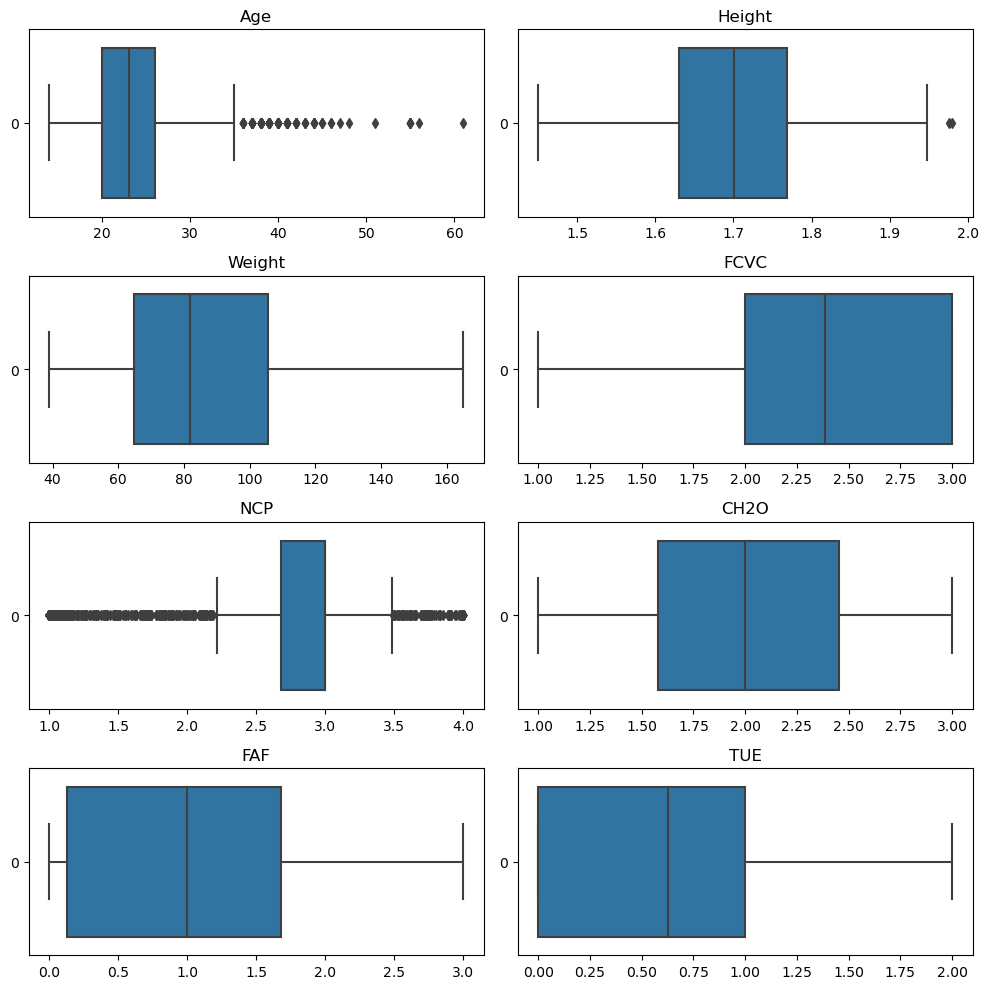

In [81]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate number of rows and columns needed
num_plots = len(numerical_columns)
num_rows = (num_plots + 1) // 2
num_cols = 2

# Plot distribution charts for numerical variables using matplotlib
plt.figure(figsize=(10, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(df[column], orient='h')
    plt.title(column)
plt.tight_layout()

# Save the output image
plt.savefig('boxplots.png')

plt.show()

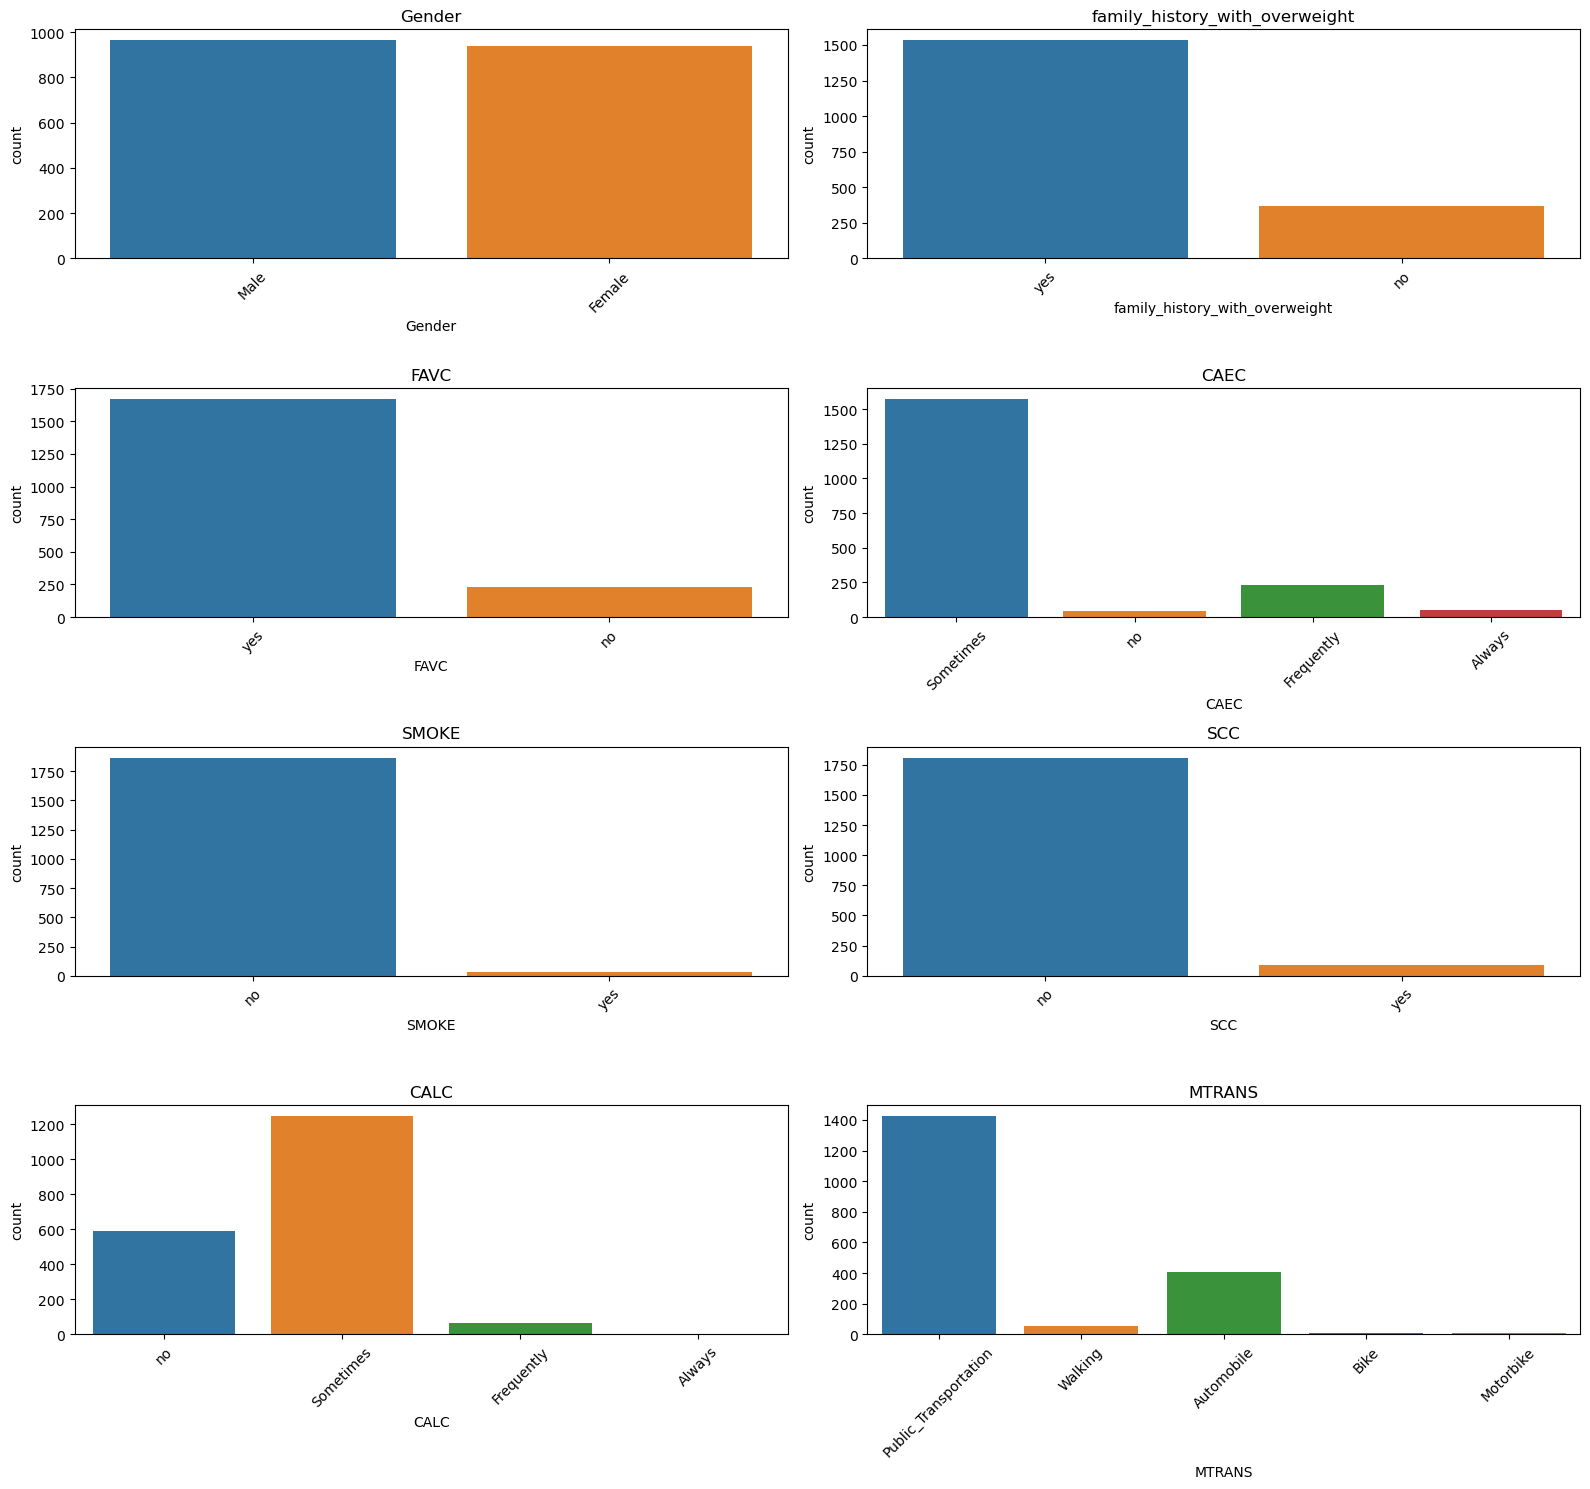

In [101]:
# Categorical variables
categorical_vars = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 15))

# Plot count plots for each categorical variable
for i, var in enumerate(categorical_vars):
    row = i // 2
    col = i % 2
    sns.countplot(data=df, x=var, ax=axes[row][col])
    axes[row][col].set_title(var)
    axes[row][col].set_xticklabels(axes[row][col].get_xticklabels(), rotation=45)

plt.tight_layout()

# Save the output image
plt.savefig('categorical_features_plot.png')

plt.show()

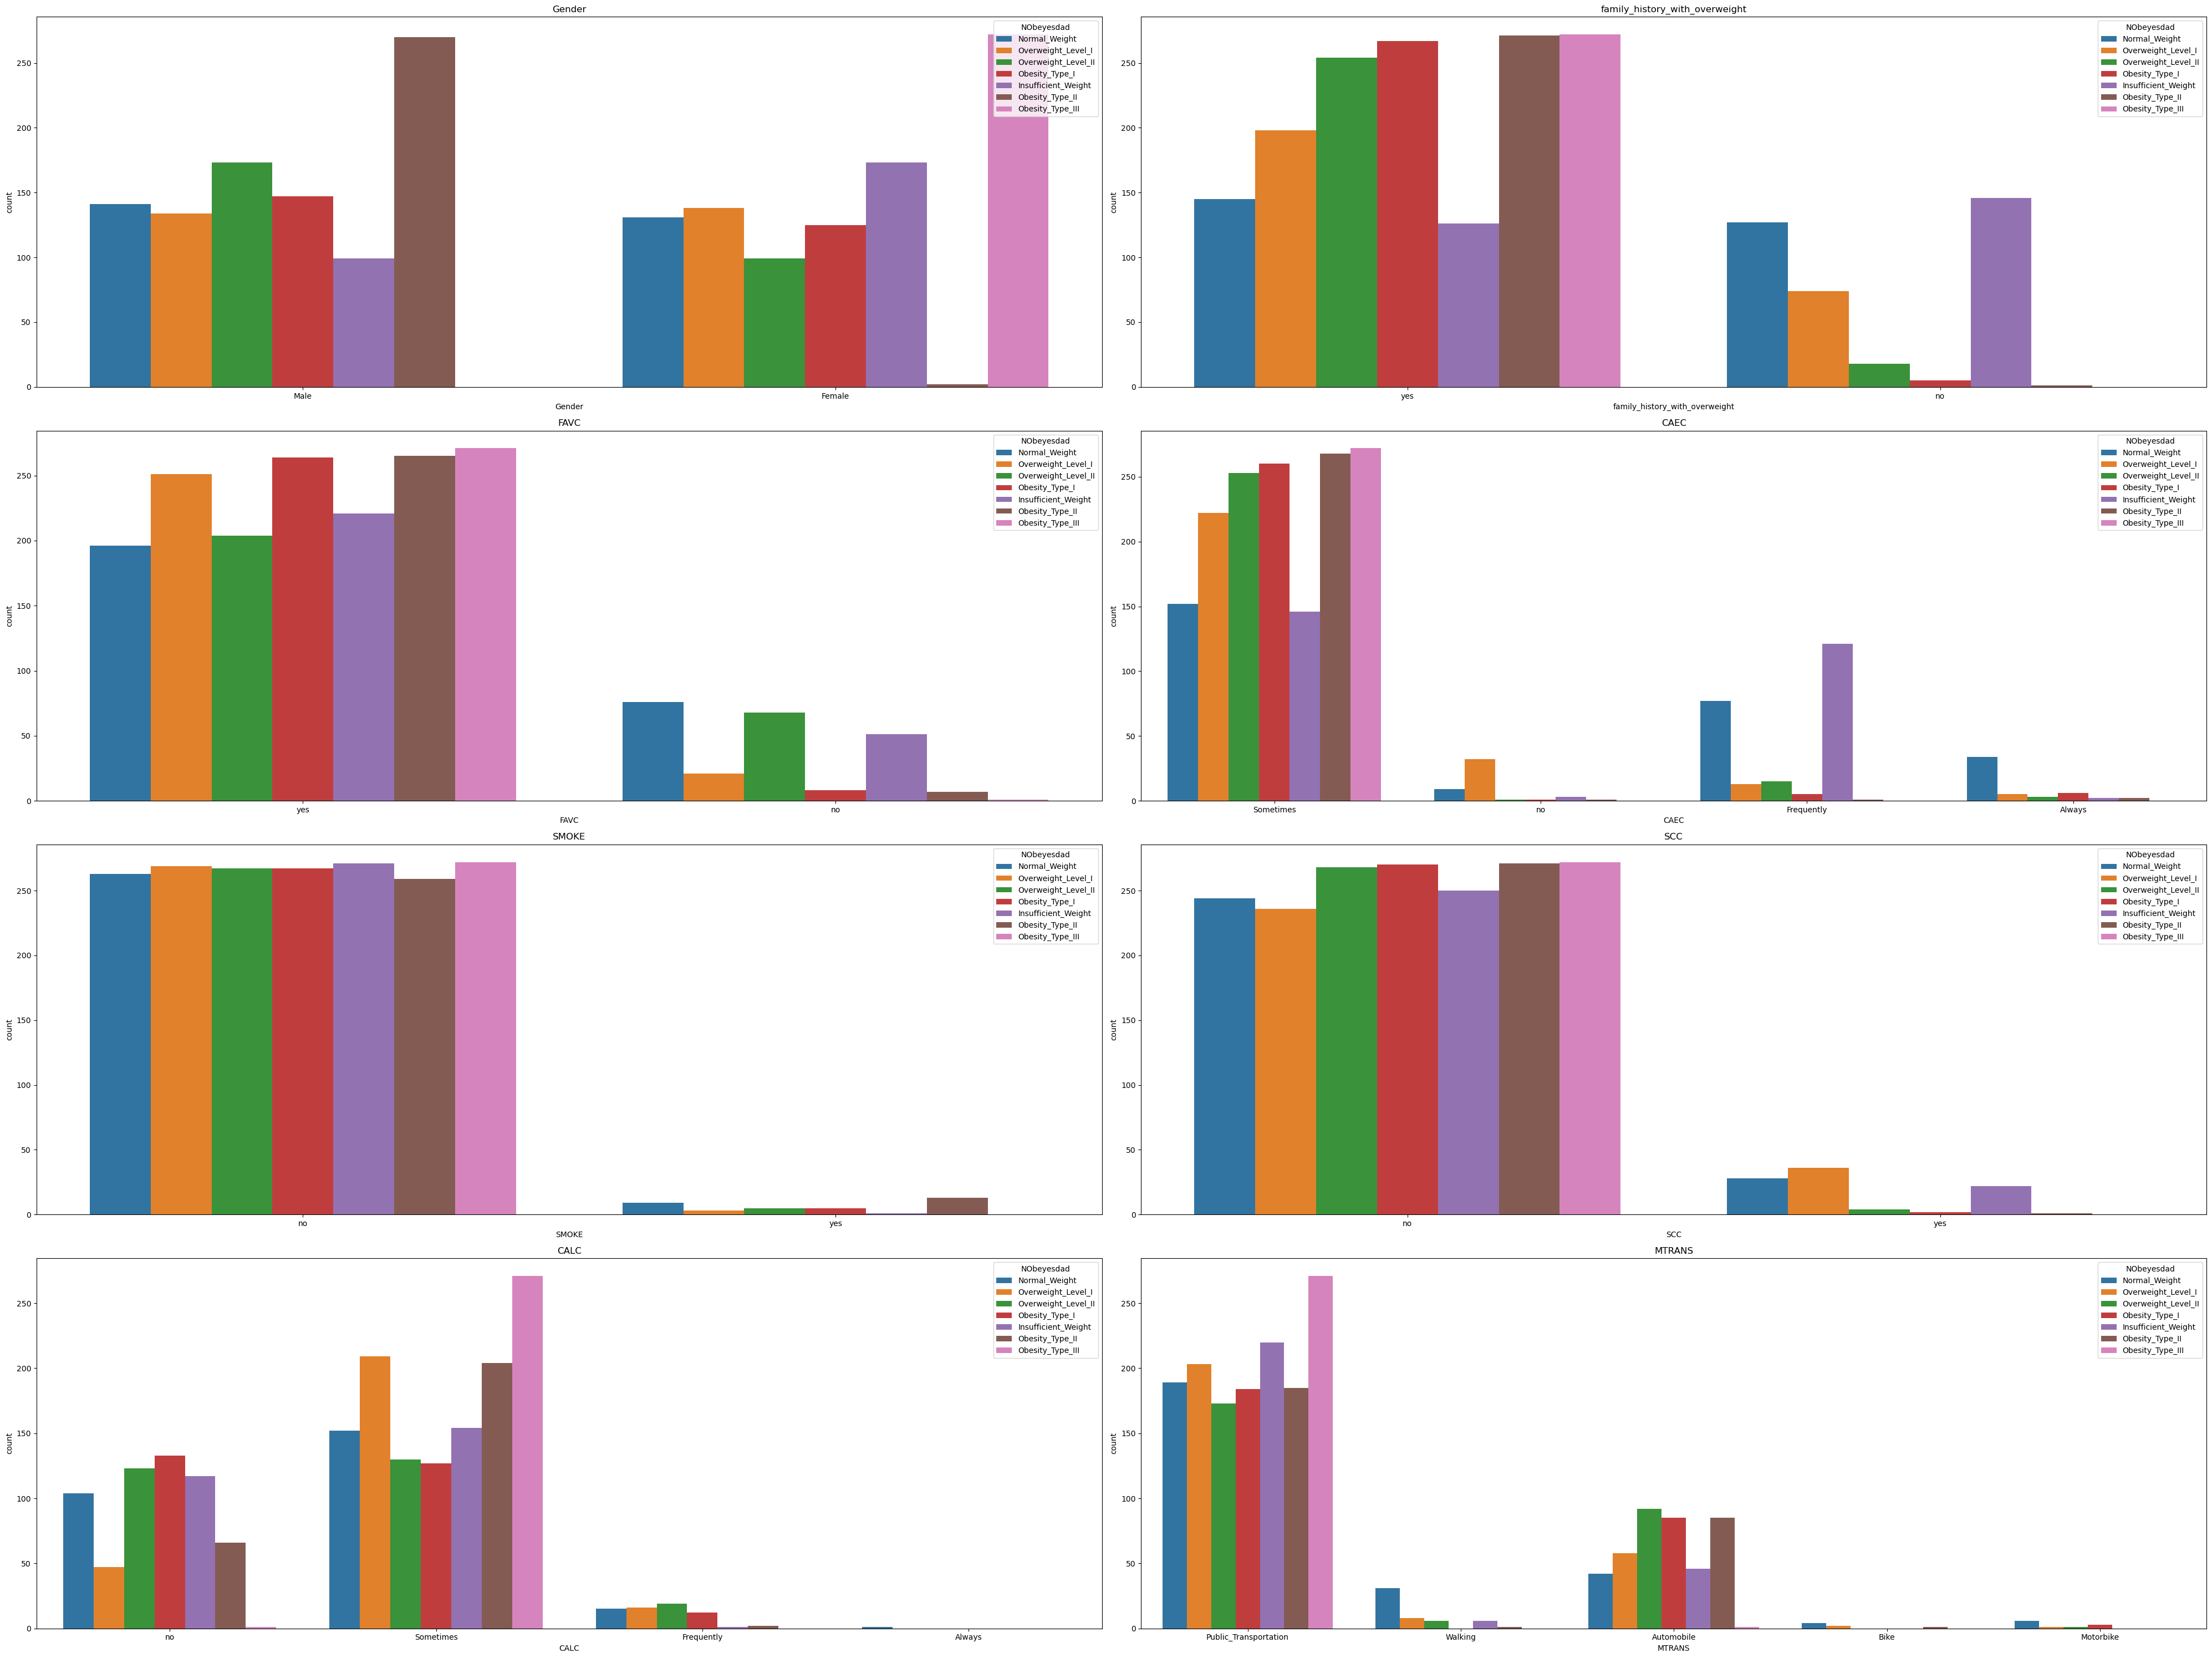

In [87]:
# Categorical columns
categorical_columns_list = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Calculate the number of rows needed for subplots
num_rows = (len(categorical_columns_list) + 1) // 2

# Plot count plots for categorical variables
plt.figure(figsize=(40, 30))
for i, column in enumerate(categorical_columns_list, 1):
    plt.subplot(num_rows, 2, i)
    sns.countplot(data=df, x=column, hue='NObeyesdad')
    plt.title(column)
    plt.legend(title='NObeyesdad', loc='upper right')
plt.tight_layout()

# Save the output image
plt.savefig('Categorical_to_Target_Plots.png')

plt.show()


C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


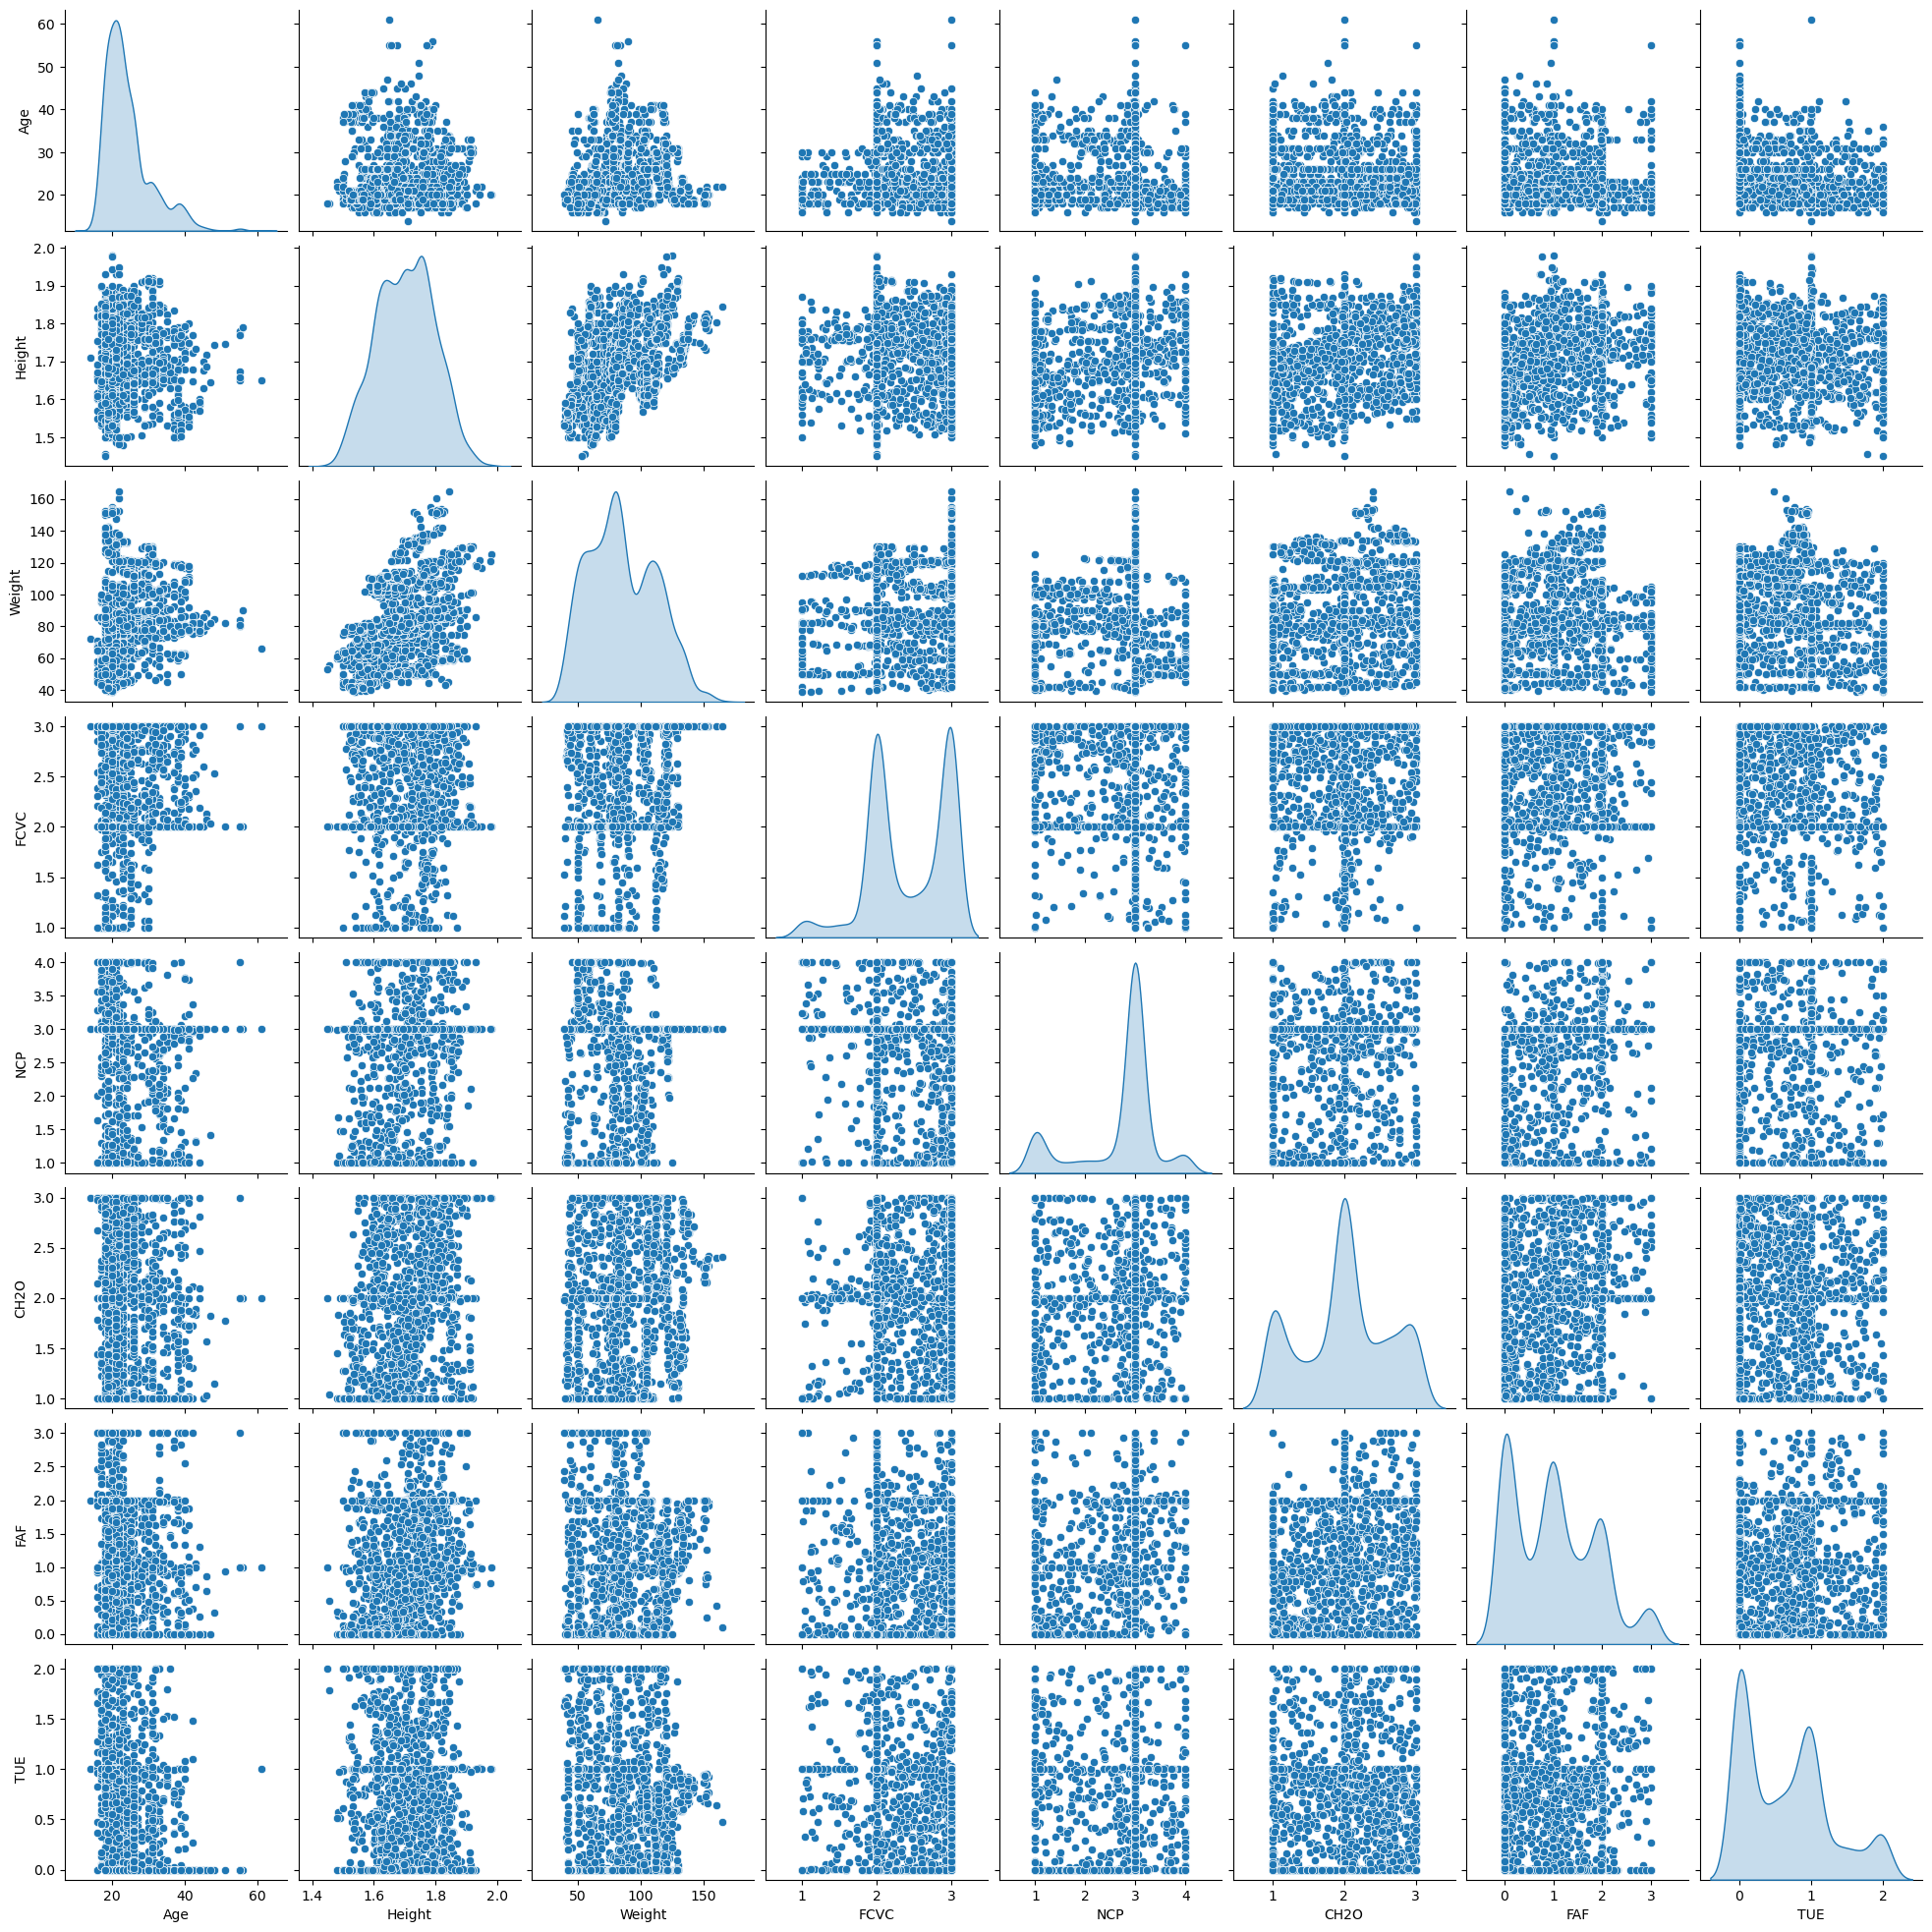

In [136]:
# Scatter plot for numerical-numerical variables
sns.pairplot(df[numerical_columns], diag_kind='kde')

# Save the output image
plt.savefig('pairplots.png')

plt.show()


## Encoding

In [105]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode non-numeric variables based on the specified order
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Check the label number assigned to each class
class_labels = label_encoder.classes_
class_encoded_values = label_encoder.transform(class_labels)

# Create a DataFrame to display class labels and their corresponding encoded values
class_encoding_df = pd.DataFrame({'Class Label': class_labels, 'Encoded Value': class_encoded_values})

# Correlation

In [109]:
# Calculate Pearson correlation coefficient matrix
corr_matrix = df.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_10860\1495981826.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


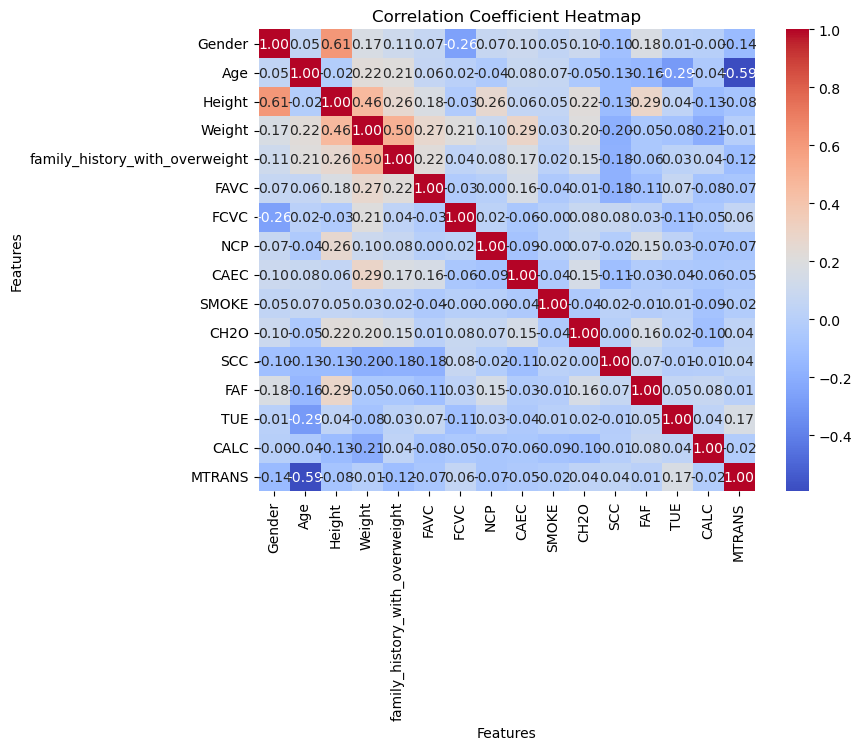

In [112]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Coefficient Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Save the output image
plt.savefig('Correlation Coefficient Heatmap.png')

plt.show()

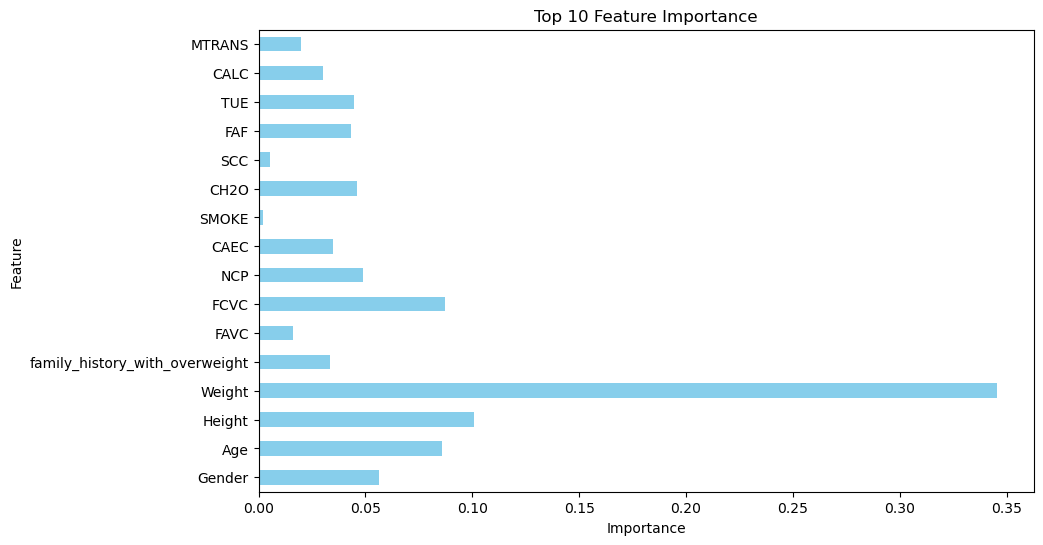

In [93]:
# Remove target column from features
X = df.drop(columns=['NObeyesdad'])

# Initialize and fit the model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importance

# Plot feature importance
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance')

# Save the output image
plt.savefig('feature_importance.png')

plt.show()

# Data Modelling and Visualization

In [113]:
# Splitting the dataset into features and target variable
X = df.drop(['NObeyesdad'], axis=1)
y = df['NObeyesdad']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier

Decision Tree Classifier:
Accuracy: 0.926509186351706
Precision: 0.9286968865013958
Recall: 0.926509186351706
F1 Score: 0.9263090173311338

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.88      0.96      0.92        46
      Normal_Weight       0.92      0.82      0.87        55
     Obesity_Type_I       0.94      0.96      0.95        51
    Obesity_Type_II       1.00      0.97      0.98        64
   Obesity_Type_III       1.00      1.00      1.00        57
 Overweight_Level_I       0.84      0.93      0.88        60
Overweight_Level_II       0.91      0.83      0.87        48

           accuracy                           0.93       381
          macro avg       0.93      0.92      0.92       381
       weighted avg       0.93      0.93      0.93       381



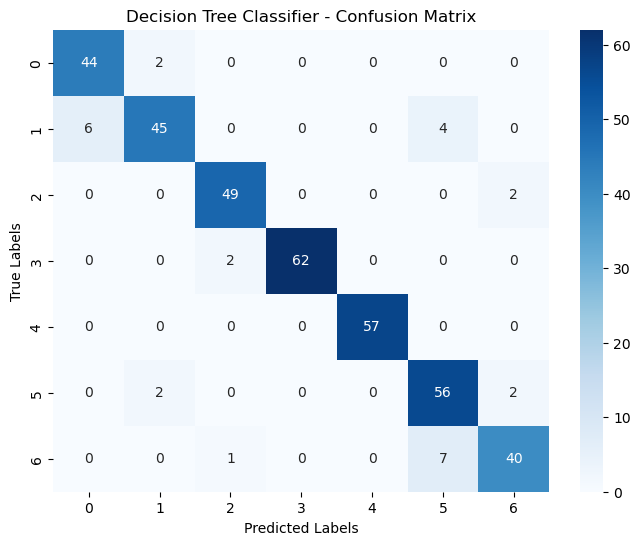

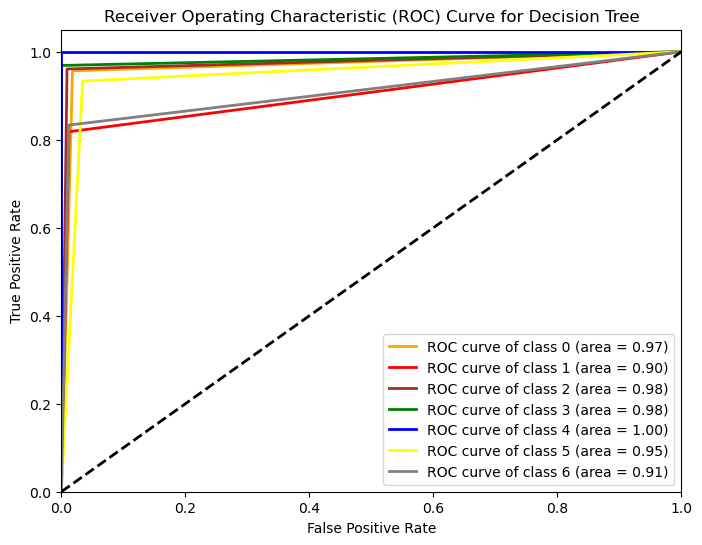

In [143]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_y_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred, average='weighted')
dt_recall = recall_score(y_test, dt_y_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_y_pred, average='weighted')
dt_report = classification_report(y_test, dt_y_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)

# Printing the evaluation metrics for all models
print("Decision Tree Classifier:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1)
print("\nClassification Report:\n", dt_report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Decision Tree Classifier - Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Calculate probabilities
dt_y_prob = dt_classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], dt_y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], dt_y_prob[:, i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
colors = ['orange','red', 'brown', 'green', 'blue', 'yellow', 'grey'] 
for i, color in zip(range(len(np.unique(y_test))), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

# Random Forest Classifier


Random Forest Classifier:
Accuracy: 0.9501312335958005
Precision: 0.9534300636662842
Recall: 0.9501312335958005
F1 Score: 0.9502113988292282

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.98      0.98      0.98        46
      Normal_Weight       0.84      0.96      0.90        55
     Obesity_Type_I       0.91      0.98      0.94        51
    Obesity_Type_II       1.00      0.98      0.99        64
   Obesity_Type_III       1.00      1.00      1.00        57
 Overweight_Level_I       0.98      0.90      0.94        60
Overweight_Level_II       0.95      0.83      0.89        48

           accuracy                           0.95       381
          macro avg       0.95      0.95      0.95       381
       weighted avg       0.95      0.95      0.95       381



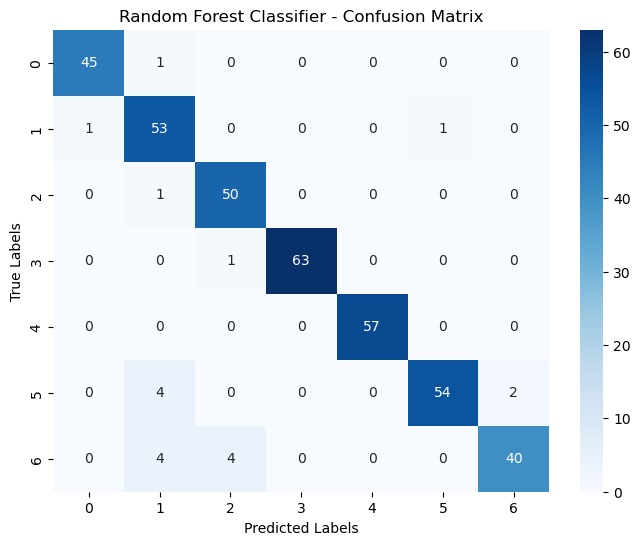

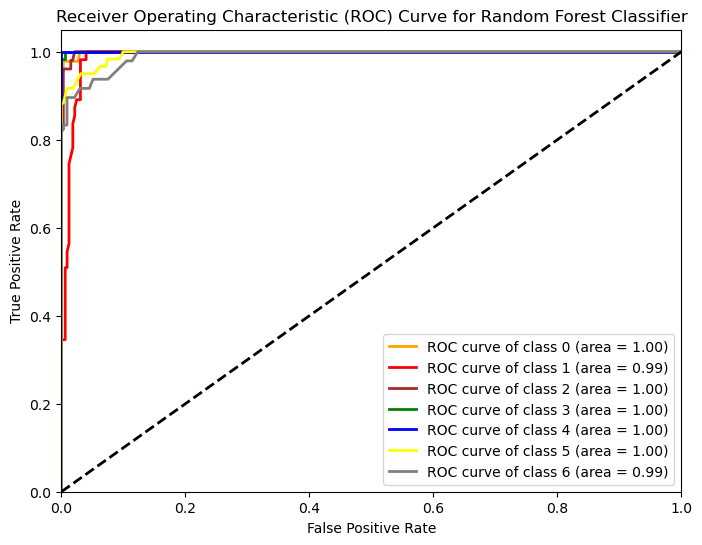

In [139]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred, average='weighted')
rf_recall = recall_score(y_test, rf_y_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_y_pred, average='weighted')
rf_report = classification_report(y_test, rf_y_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

# Printing the evaluation metrics for Random Forest Classifier
print("\nRandom Forest Classifier:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("\nClassification Report:\n", rf_report)

# Plot Confusion Matrix for Random Forest Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Random Forest Classifier - Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Binarize the output for Random Forest Classifier
rf_y_prob = rf_classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for Random Forest Classifier
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for i in range(len(np.unique(y_test))):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_bin[:, i], rf_y_prob[:, i])
    roc_auc_rf[i] = roc_auc_score(y_test_bin[:, i], rf_y_prob[:, i])

# Plot ROC curve for Random Forest Classifier
plt.figure(figsize=(8, 6))
colors = ['orange','red', 'brown', 'green', 'blue', 'yellow', 'grey']
for i, color in zip(range(len(np.unique(y_test))), colors):
    plt.plot(fpr_rf[i], tpr_rf[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc_rf[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

# Gradient Boosting Classifier


Gradient Boosting Classifier:
Accuracy: 0.952755905511811
Precision: 0.954154189123679
Recall: 0.952755905511811
F1 Score: 0.9525539061483294

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.92      1.00      0.96        46
      Normal_Weight       0.96      0.91      0.93        55
     Obesity_Type_I       0.89      1.00      0.94        51
    Obesity_Type_II       1.00      0.97      0.98        64
   Obesity_Type_III       1.00      1.00      1.00        57
 Overweight_Level_I       0.95      0.92      0.93        60
Overweight_Level_II       0.93      0.88      0.90        48

           accuracy                           0.95       381
          macro avg       0.95      0.95      0.95       381
       weighted avg       0.95      0.95      0.95       381



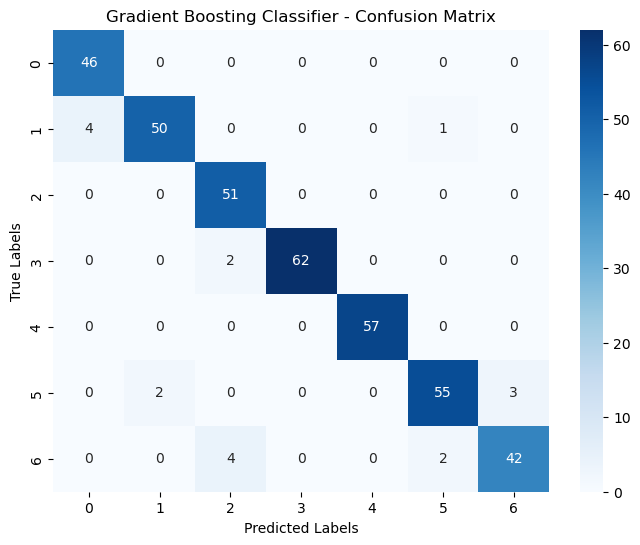

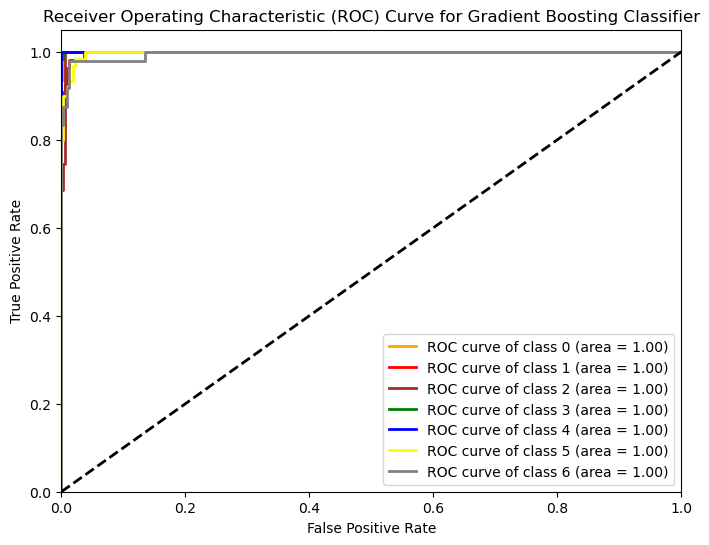

In [140]:
# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)
gb_y_pred = gb_classifier.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_y_pred)
gb_precision = precision_score(y_test, gb_y_pred, average='weighted')
gb_recall = recall_score(y_test, gb_y_pred, average='weighted')
gb_f1 = f1_score(y_test, gb_y_pred, average='weighted')
gb_report = classification_report(y_test, gb_y_pred)

# Printing the evaluation metrics for Gradient Boosting Classifier
print("\nGradient Boosting Classifier:")
print("Accuracy:", gb_accuracy)
print("Precision:", gb_precision)
print("Recall:", gb_recall)
print("F1 Score:", gb_f1)
print("\nClassification Report:\n", gb_report)

# Plot Confusion Matrix for Gradient Boosting Classifier
gb_conf_matrix = confusion_matrix(y_test, gb_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(gb_conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Gradient Boosting Classifier - Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Binarize the output for Gradient Boosting Classifier
gb_y_prob = gb_classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for Gradient Boosting Classifier
fpr_gb = dict()
tpr_gb = dict()
roc_auc_gb = dict()
for i in range(len(np.unique(y_test))):
    fpr_gb[i], tpr_gb[i], _ = roc_curve(y_test_bin[:, i], gb_y_prob[:, i])
    roc_auc_gb[i] = roc_auc_score(y_test_bin[:, i], gb_y_prob[:, i])

# Plot ROC curve for Gradient Boosting Classifier
plt.figure(figsize=(8, 6))
colors = ['orange','red', 'brown', 'green', 'blue', 'yellow', 'grey']
for i, color in zip(range(len(np.unique(y_test))), colors):
    plt.plot(fpr_gb[i], tpr_gb[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc_gb[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Gradient Boosting Classifier')
plt.legend(loc="lower right")
plt.show()

# Support Vector Machine


Support Vector Machine (SVM):
Accuracy: 0.8608923884514436
Precision: 0.8636412044712246
Recall: 0.8608923884514436
F1 Score: 0.8565343314259005

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.82      1.00      0.90        46
      Normal_Weight       0.86      0.58      0.70        55
     Obesity_Type_I       0.85      0.88      0.87        51
    Obesity_Type_II       0.96      1.00      0.98        64
   Obesity_Type_III       1.00      1.00      1.00        57
 Overweight_Level_I       0.72      0.80      0.76        60
Overweight_Level_II       0.82      0.75      0.78        48

           accuracy                           0.86       381
          macro avg       0.86      0.86      0.85       381
       weighted avg       0.86      0.86      0.86       381



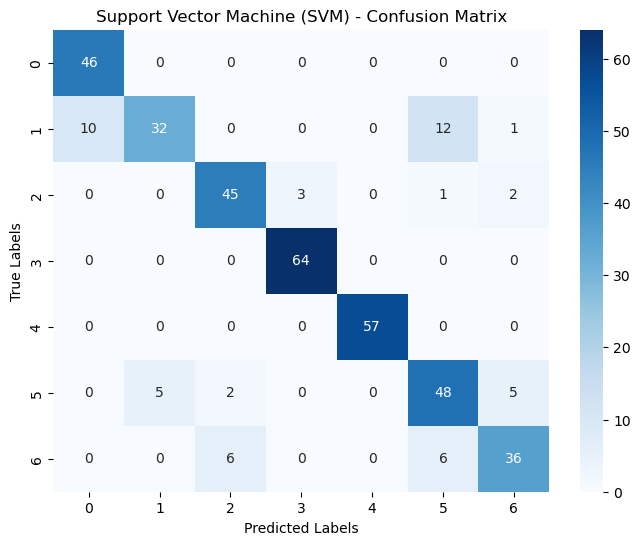

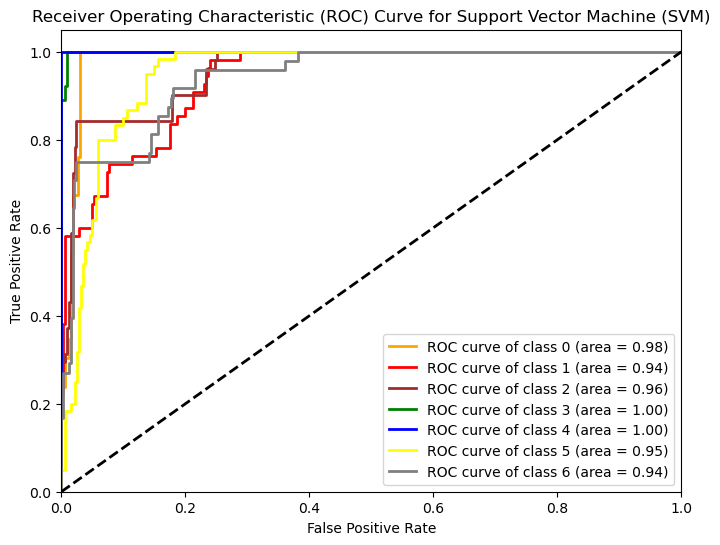

In [141]:
# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
svm_y_pred = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred, average='weighted')
svm_recall = recall_score(y_test, svm_y_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_y_pred, average='weighted')
svm_report = classification_report(y_test, svm_y_pred)

# Printing the evaluation metrics for SVM
print("\nSupport Vector Machine (SVM):")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)
print("\nClassification Report:\n", svm_report)

# Plot Confusion Matrix for SVM
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Support Vector Machine (SVM) - Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Binarize the output for SVM
svm_y_prob = svm_classifier.decision_function(X_test)

# Compute ROC curve and ROC area for SVM
fpr_svm = dict()
tpr_svm = dict()
roc_auc_svm = dict()
for i in range(len(np.unique(y_test))):
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_test_bin[:, i], svm_y_prob[:, i])
    roc_auc_svm[i] = roc_auc_score(y_test_bin[:, i], svm_y_prob[:, i])

# Plot ROC curve for SVM
plt.figure(figsize=(8, 6))
colors = ['orange','red', 'brown', 'green', 'blue', 'yellow', 'grey']
for i, color in zip(range(len(np.unique(y_test))), colors):
    plt.plot(fpr_svm[i], tpr_svm[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc_svm[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Support Vector Machine (SVM)')
plt.legend(loc="lower right")
plt.show()


# KNN


K-Nearest Neighbors (KNN):
Accuracy: 0.847769028871391
Precision: 0.8539043254483125
Recall: 0.847769028871391
F1 Score: 0.8413183893019128

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.78      0.93      0.85        46
      Normal_Weight       0.81      0.47      0.60        55
     Obesity_Type_I       0.80      0.92      0.85        51
    Obesity_Type_II       1.00      0.95      0.98        64
   Obesity_Type_III       0.98      1.00      0.99        57
 Overweight_Level_I       0.71      0.87      0.78        60
Overweight_Level_II       0.86      0.77      0.81        48

           accuracy                           0.85       381
          macro avg       0.85      0.85      0.84       381
       weighted avg       0.85      0.85      0.84       381



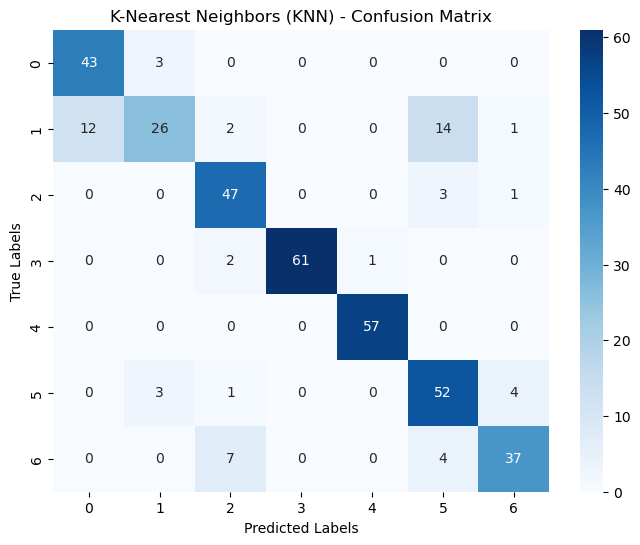

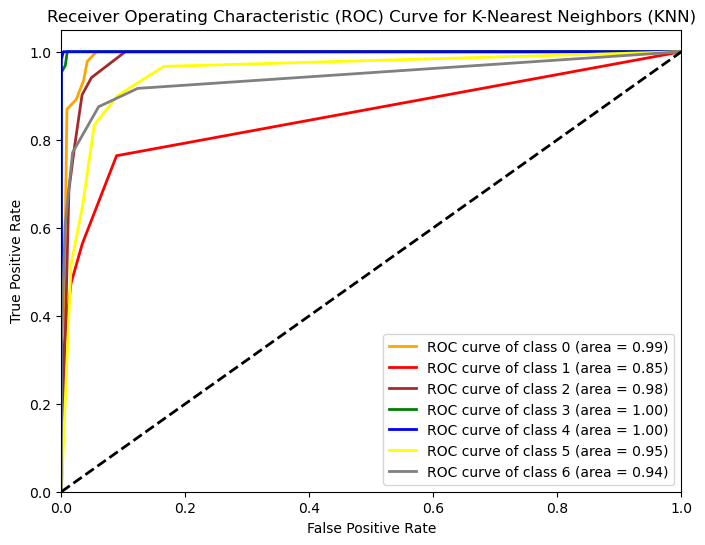

In [142]:
# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_y_pred = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_precision = precision_score(y_test, knn_y_pred, average='weighted')
knn_recall = recall_score(y_test, knn_y_pred, average='weighted')
knn_f1 = f1_score(y_test, knn_y_pred, average='weighted')
knn_report = classification_report(y_test, knn_y_pred)

# Printing the evaluation metrics for K-Nearest Neighbors (KNN)
print("\nK-Nearest Neighbors (KNN):")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)
print("\nClassification Report:\n", knn_report)

# Plot Confusion Matrix for K-Nearest Neighbors (KNN)
knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('K-Nearest Neighbors (KNN) - Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Binarize the output for K-Nearest Neighbors (KNN)
knn_y_prob = knn_classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for K-Nearest Neighbors (KNN)
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
for i in range(len(np.unique(y_test))):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_bin[:, i], knn_y_prob[:, i])
    roc_auc_knn[i] = roc_auc_score(y_test_bin[:, i], knn_y_prob[:, i])

# Plot ROC curve for K-Nearest Neighbors (KNN)
plt.figure(figsize=(8, 6))
colors = ['orange','red', 'brown', 'green', 'blue', 'yellow', 'grey']
for i, color in zip(range(len(np.unique(y_test))), colors):
    plt.plot(fpr_knn[i], tpr_knn[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc_knn[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for K-Nearest Neighbors (KNN)')
plt.legend(loc="lower right")
plt.show()